<a href="https://colab.research.google.com/github/Harsh28-raj/ml_projects/blob/main/credit_crd_frd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/dataset(1).csv")

In [ ]:
df.head()

In [ ]:
df.sample()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.sample(2)

In [ ]:
drop_cols = [
    "cc_num",
    "first",
    "last",
    "street",
    "city",
    "job",
    "merchant",
    "trans_num",
    "dob",
    "trans_date_trans_time"
]

In [ ]:
df=df.drop(columns=drop_cols)

In [ ]:
df = df.drop(columns=["Unnamed: 0"])


In [ ]:
df.info()

In [ ]:
df["is_fraud"].value_counts(normalize=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.sample(5)

0=normal transaction


1=fraud transaction


In [ ]:
df.is_fraud.value_counts()

In [ ]:

count = [0, 10, 50, 100, 500, 1000, np.inf]
range = ["0-10", "10-50", "50-100", "100-500", "500-1000", "1000+"]

amt_bins = pd.cut(df["amt"], bins=count, labels=range, include_lowest=True)

amt_bins.value_counts().sort_index()


In [ ]:
import matplotlib.pyplot as plt

# Count transactions in each bin
amt_counts = amt_bins.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
plt.bar(amt_counts.index.astype(str), amt_counts.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Number of Transactions")
plt.title("Transaction Count by Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df["amt_range"] = amt_bins

fraud_rate = df.groupby("amt_range")["is_fraud"].mean()

plt.figure(figsize=(8, 4))
plt.bar(fraud_rate.index.astype(str), fraud_rate.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation (THIS IS GOLD 🥇)

✔ High-value transactions have much higher fraud probability


✔ Fraudsters target large amounts

✔ Model must treat high amounts differently

This is EXACTLY what banks see in real data.

In [ ]:
df["category"].value_counts().sort_values(ascending=False)


In [ ]:
df.groupby("gender")["is_fraud"].mean()


In [ ]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(4,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Transaction Count by Gender")
plt.show()


In [71]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,log_amt,hour,dayofweek,is_weekend,cust_merch_dist
0,misc_net,4.97,F,NC,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,1.786747,0.0,6.0,1,78.597568
1,grocery_pos,107.23,F,WA,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,4.684259,0.0,6.0,1,30.212176
2,entertainment,220.11,M,ID,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,5.398660,0.0,6.0,1,108.206083
3,gas_transport,45.00,M,MT,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,3.828641,0.0,6.0,1,95.673231
4,misc_pos,41.96,M,VA,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,3.760269,0.0,6.0,1,77.556744


FEATURE ENGINEERING

In [ ]:
df["log_amt"] = np.log1p(df["amt"])

In [ ]:
df.columns

In [ ]:
df.head()

✔ Yes, this automatically segments time

✔ Hour → 24 segments

✔ Day → 7 segments

✔ Weekend → clean fraud indicator

✔ No extra binning needed

In [ ]:
dt = pd.to_datetime(df["unix_time"], unit="s")

df["hour"] = dt.dt.hour
df["dayofweek"] = dt.dt.dayofweek
df["is_weekend"] = dt.dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df["is_weekend"].value_counts()

In [ ]:
df["hour"].value_counts()

In [ ]:
import numpy as np

# Earth radius in km
R = 6371

lat1 = np.radians(df["lat"])
lon1 = np.radians(df["long"])
lat2 = np.radians(df["merch_lat"])
lon2 = np.radians(df["merch_long"])

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2

df["cust_merch_dist"] = 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df[["amt", "log_amt", "hour", "dayofweek", "is_weekend", "cust_merch_dist"]].head()

In [ ]:
df = df.drop(columns=["amt_range"])

In [78]:
df[["amt", "cust_merch_dist"]].describe(percentiles=[0.95, 0.99])

,amt,cust_merch_dist
count,1.009817e+06,1.009816e+06
mean,7.025131e+01,7.609966e+01
std,1.599178e+02,2.911666e+01
min,1.000000e+00,2.225452e-02
50%,4.743000e+01,7.820907e+01
95%,1.960700e+02,1.204888e+02
99%,5.447168e+02,1.320717e+02
max,2.894890e+04,1.521172e+02


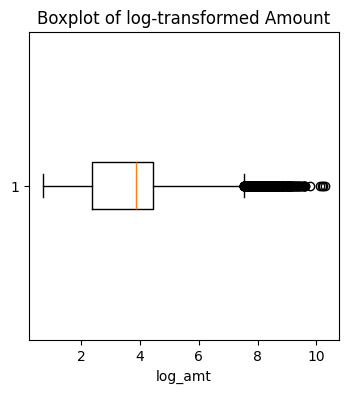

In [81]:
plt.figure(figsize=(4, 4))
plt.boxplot(df["log_amt"], vert=False)
plt.xlabel("log_amt")
plt.title("Boxplot of log-transformed Amount")
plt.show()

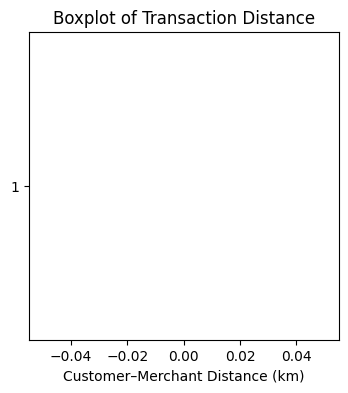

In [82]:
plt.figure(figsize=(4, 4))
plt.boxplot(df["cust_merch_dist"], vert=False)
plt.xlabel("Customer–Merchant Distance (km)")
plt.title("Boxplot of Transaction Distance")
plt.show()
